In [1]:
import os
import sys
import glob
import numpy as np
import numpy
import pandas as pd
from ast import literal_eval
import  matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
def load_data(path):
    df = pd.read_csv(path)
    test = df[df['phase'] == 'testing']
    train = df[df['phase'] == 'training']
    return train,test



In [3]:
def get_stats(model_name,column):
    path = '/gpfs/data/geraslab/Yanqi/saves/toolsforML/'
    model_paths = sorted(glob.glob(os.path.join(path,model_name)))
    df_all = []
    for i,model in enumerate(model_paths):
        _,df = load_data(os.path.join(model_paths[i],'performance.csv'))
        df_all.append(df[:500][column])
    df_all = np.array(df_all)
    df_mean = df_all.mean(axis=0)
    df_std = df_all.std(axis=0)
    return df_mean,df_std

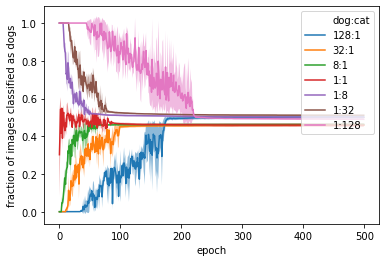

In [5]:
weights=['128:1','32:1','8:1','1:1','1:8','1:32','1:128']
t = np.arange(500)
c = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink']
plt.plot([], [], ' ', label="dog:cat")  
for i,w in enumerate(weights):
    dog = int(w.split(':')[0])
    cat = int(w.split(':')[1])
    model_name ="baseline{}_{}_s*".format(dog,cat)
    mean,std = get_stats(model_name,'frac_in_cat/dog')
    plt.plot(mean,label='{}:{}'.format(dog,cat),color=c[i])
    plt.fill_between(t,mean+std, mean-std,facecolor=c[i],alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('fraction of images classified as dogs')

plt.show()



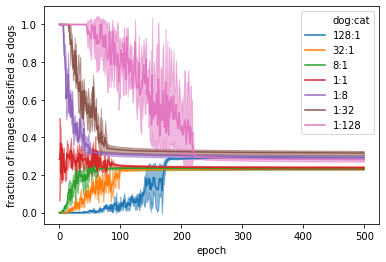

In [6]:
plt.plot([], [], ' ', label="dog:cat")  
for i,w in enumerate(weights):
    dog = int(w.split(':')[0])
    cat = int(w.split(':')[1])
    model_name ="baseline{}_{}_*".format(dog,cat)
    mean,std = get_stats(model_name,'frac_in_others')
    plt.plot(mean,label='{}:{}'.format(dog,cat),color=c[i])
    plt.fill_between(t,mean+std, mean-std,color=c[i],alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('fraction of images classified as dogs')


plt.show()

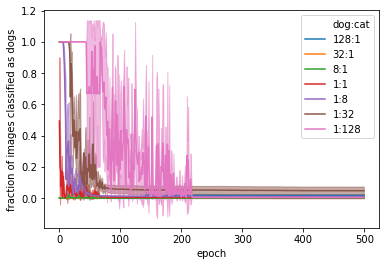

In [7]:
plt.plot([], [], ' ', label="dog:cat")  
for i,w in enumerate(weights):
    dog = int(w.split(':')[0])
    cat = int(w.split(':')[1])
    model_name ="baseline{}_{}_*".format(dog,cat)
    mean,std = get_stats(model_name,'frac_in_random')
    plt.plot(mean,label='{}:{}'.format(dog,cat),color=c[i])
    plt.fill_between(t,mean+std, mean-std,color=c[i],alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('fraction of images classified as dogs')


plt.show()

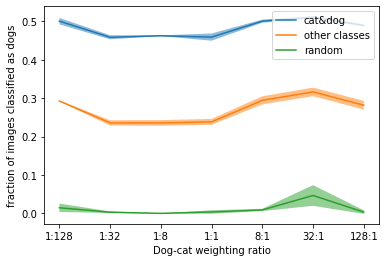

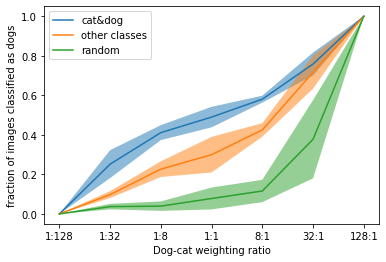

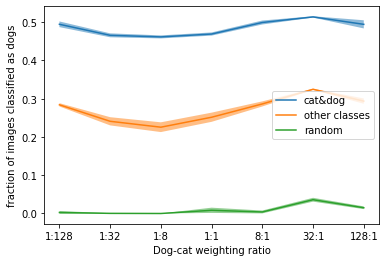

In [10]:
for n in ['baseline','weight_decay','dropout']:

    weights=['1:128','1:32','1:8','1:1','8:1','32:1','128:1']
    columns = ['frac_in_cat/dog','frac_in_others','frac_in_random']
    mean=np.zeros((len(weights),3))
    std=np.zeros((len(weights),3))
    for i,w in enumerate(weights):
        dog = int(w.split(':')[1])
        cat = int(w.split(':')[0])
        model_name ="{}{}_{}_*".format(n,dog,cat)
        path = '/gpfs/data/geraslab/Yanqi/saves/toolsforML/'
        model_paths = sorted(glob.glob(os.path.join(path,model_name)))
        df_all = np.zeros((len(model_paths),len(columns)))
        for j,model in enumerate(model_paths):
            _,df = load_data(os.path.join(model_paths[j],'performance.csv'))
            for k,c in enumerate(columns):
                #print(df[c])
                df_all[j,k]=df[c].iloc[-1]
        mean[i,:] = df_all.mean(axis = 0)
        std[i,:] = df_all.std(axis = 0)

    plt.plot(mean)
    for i in np.arange(3):
        plt.fill_between(np.arange(7),mean[:,i]+std[:,i], mean[:,i]-std[:,i],alpha=0.5)
    plt.legend(["cat&dog",'other classes','random'])
    plt.ylabel('fraction of images classified as dogs')
    plt.xlabel('Dog-cat weighting ratio')
    plt.xticks(np.arange(7), weights)
    #plt.ylim(0,1)
    plt.show()

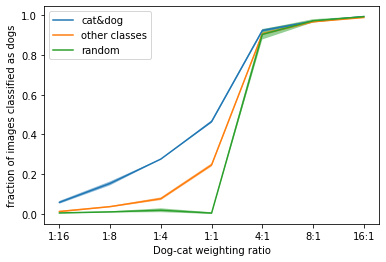

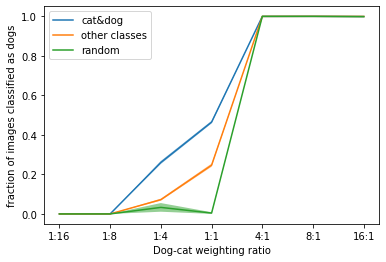

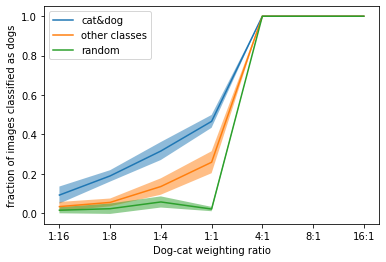

In [11]:
names = ['imbalanced','imbalanced_weighted','imbalanced_weighted_wd']
for t in names:
    weights=['1:16','1:8','1:4','1:1','4:1','8:1','16:1']
    columns = ['frac_in_cat/dog','frac_in_others','frac_in_random']
    mean=np.zeros((len(weights),3))
    std=np.zeros((len(weights),3))
    for i,w in enumerate(weights):
        dog = int(w.split(':')[1])
        cat = int(w.split(':')[0])
        model_name ="{}_{}_{}_s*".format(t,dog,cat)
        path = '/gpfs/data/geraslab/Yanqi/saves/toolsforML/'
        model_paths = sorted(glob.glob(os.path.join(path,model_name)))#
        df_all = np.zeros((len(model_paths),len(columns)))
        for j,model in enumerate(model_paths):
            _,df = load_data(os.path.join(model_paths[j],'performance.csv'))
            for k,c in enumerate(columns):
                #print(df[c])
                df_all[j,k]=df[c].iloc[110]
        mean[i,:] = df_all.mean(axis = 0)
        std[i,:] = df_all.std(axis = 0)


    plt.plot(mean)
    for i in np.arange(3):
        plt.fill_between(np.arange(7),mean[:,i]+std[:,i], mean[:,i]-std[:,i],alpha=0.5)
    plt.legend(["cat&dog",'other classes','random'])
    plt.ylabel('fraction of images classified as dogs')
    plt.xlabel('Dog-cat weighting ratio')
    plt.xticks(np.arange(7), weights)
    #plt.ylim(0,1)
    plt.show()

In [12]:
t = np.repeat(np.arange(7)[:,np.newaxis],3,axis=1)

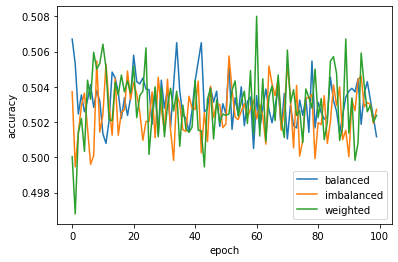

In [13]:
def get_stats_extension(model_name,column):
    path = '/gpfs/data/geraslab/Yanqi/saves/toolsforML/'
    model_paths = sorted(glob.glob(os.path.join(path,model_name)))
    df_all = []
    for i,model in enumerate(model_paths):
        train_df, val_df = load_data(os.path.join(model_paths[i],'performance.csv'))
        df_all.append(val_df[:100][column])
    df_all = np.array(df_all)
    df_mean = df_all.mean(axis=0)
    df_std = None#df_all.std(axis=0)
    return df_mean,df_std


names=['extension_baseline_wd_dr_l1_aug_bs8*',"extension_imbalanced*","extension_weighted*"]
t = np.arange(100)
c = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink']
#plt.plot([], [], ' ', label="dog:cat")  
for i,model_name in enumerate(names):
    mean,std = get_stats_extension(model_name,'acc')
    plt.plot(mean,label=model_name,color=c[i])
    #plt.fill_between(t,mean+std, mean-std,facecolor=c[i],alpha=0.5)
plt.legend(['balanced','imbalanced','weighted'],loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()